# Superstore Sales Analysis

### Step 1: Import & Clean Data

In [208]:
# Step 1 - Libraries Import

In [209]:
import pandas as pd

In [17]:
# Step 2 - Dataset Load

In [210]:
df = pd.read_csv(r"C:\Users\pttha\Desktop\Sample - Superstore.csv", encoding='latin-1')

In [18]:
# Step 3 - Basic Info

In [211]:
df.shape

(9994, 21)

In [212]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [214]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [25]:
# Step 4 - First 5 rows

In [ ]:
df.head()

In [26]:
# Step 5 - Null & Duplicate Check

In [32]:
df.isnull().sum().sum()

np.int64(0)

In [31]:
df.duplicated().sum()

np.int64(0)

In [33]:
# Step 6 - Convert Dates to datetime

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [39]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Step 2: Exploratory Data Analysis

#### 🔹 2.1 Basic Dataset Summary 

In [ ]:
# Basic stats

In [46]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#### 🔹 2.2 Sales & Profit Overview

In [47]:
# Total Sales & Profit

In [56]:
Ts=df['Sales'].sum()
print("Total Sales :",round(Ts,2),"$")

Total Sales : 2297200.86 $


In [55]:
tp=df['Profit'].sum()
print("Total Profit:",round(tp,2),"$")

Total Profit: 286397.02 $


In [57]:
# Average Order Value

In [63]:
ar=df['Sales'].mean()
print("Average Order Value is",round(ar,2),'$')

Average Order Value is 229.86 $


#### 🔹 2.3 Category & Sub-Category Analysis

In [64]:
# Sales by Category

In [65]:
df.groupby("Category")['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [215]:
# Profit by Category

In [218]:
df.groupby("Category")["Profit"].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [ ]:
# Sales by Sub-Category

In [66]:
df.groupby("Sub-Category")['Sales'].sum()

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [221]:
# Profit by Sub-Category

In [220]:
df.groupby("Sub-Category")['Profit'].sum()

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

#### 🔹 2.4 Regional Analysis

In [67]:
# Sales & Profit by Region

In [6]:
df.groupby("Region")[["Sales","Profit"]].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


#### 🔹 2.5 Time Series Check

In [7]:
# Sales by Year

In [16]:
df["Year"] = df["Order Date"].dt.year
df.groupby("Year")['Sales'].sum()

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

### Step 3: Visualization

#### 3.1.1 Sales by Category

Text(0.5, 1.0, 'Total Sales By Category')

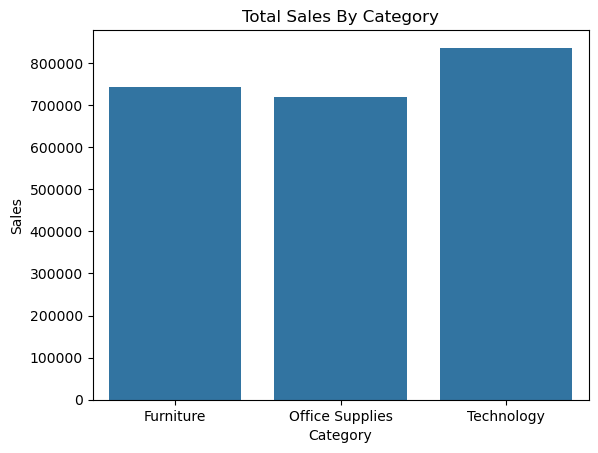

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=df, x='Category', y='Sales', estimator = sum ,errorbar=None)
plt.title("Total Sales By Category")

#### 3.1.2 Profit by Category

[Text(0, 0, '18451.3'), Text(0, 0, '122491'), Text(0, 0, '145455')]

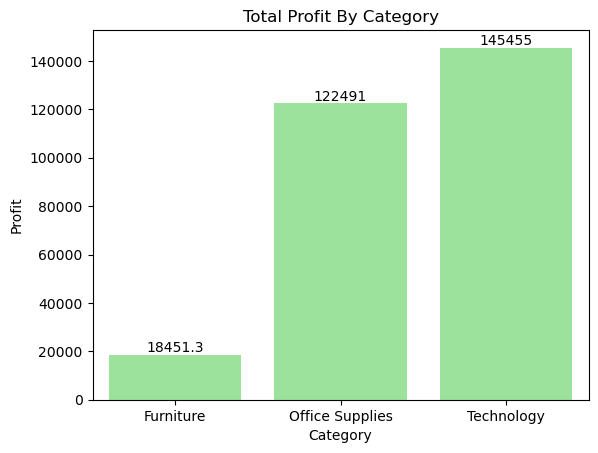

In [222]:
pc = sns.barplot(df , x="Category", y="Profit", estimator= sum, errorbar= None, color="lightgreen")
plt.title("Total Profit By Category")
pc.bar_label(pc.containers[0])

#### 3.2 Top Sub-categories by Sales (Horizontal Bar Plot)

Text(0.5, 1.0, 'Total Sales By Sub-Category')

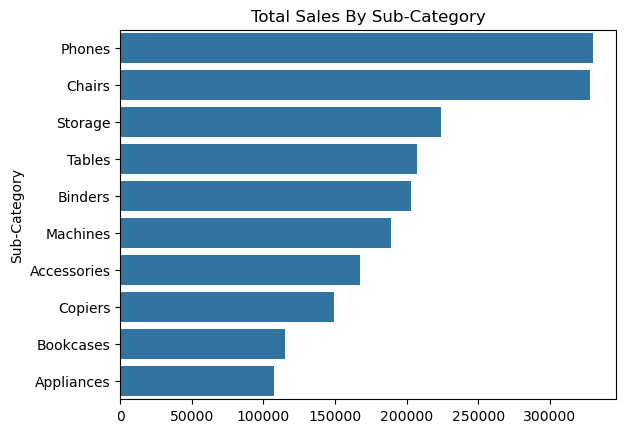

In [223]:
sub_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
ax=sns.barplot(x=sub_sales.values,y=sub_sales.index)
plt.title("Total Sales By Sub-Category")

#### 3.2 Top Sub-categories by Profit (Horizontal Bar Plot)

Text(0.5, 1.0, 'Total Profit By Sub-Category')

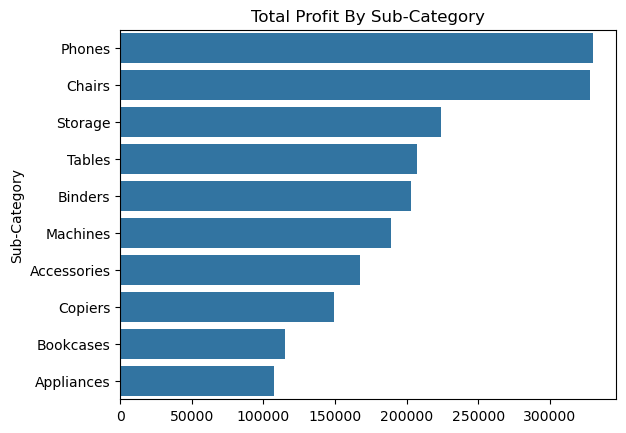

In [206]:
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
ax=sns.barplot(x=sub_sales.values,y=sub_sales.index)
plt.title("Total Profit By Sub-Category")

#### 3.3 Regional Sales & Profit Analysis

#### 3.3.1 Sales By Region

[Text(0, 0, '391722'),
 Text(0, 0, '725458'),
 Text(0, 0, '501240'),
 Text(0, 0, '678781')]

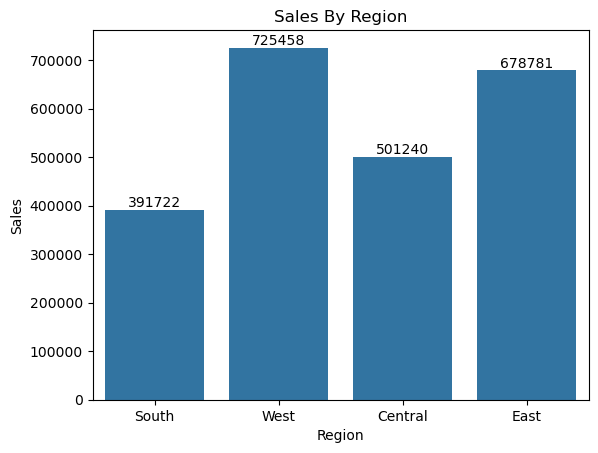

In [33]:
ax = sns.barplot(data = df, x ='Region', y ='Sales', estimator = sum, errorbar=None)
plt.title("Sales By Region")
ax.bar_label(ax.containers[0])

#### 3.3.2 Profit By Region

[Text(0, 0, '46749.4'),
 Text(0, 0, '108418'),
 Text(0, 0, '39706.4'),
 Text(0, 0, '91522.8')]

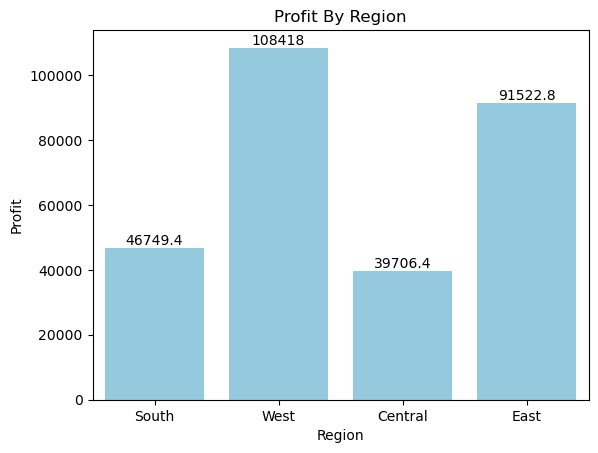

In [9]:
bx = sns.barplot(data=df, x = 'Region', y = 'Profit', estimator=sum,color='skyblue' ,errorbar=None)
plt.title("Profit By Region")
bx.bar_label(bx.containers[0])

### 3.4 Time Series Analysis

#### 3.4.1 Yearly Sales Trend

In [11]:
df['Year']=df['Order Date'].dt.year

Text(0, 0.5, 'Total Sales')

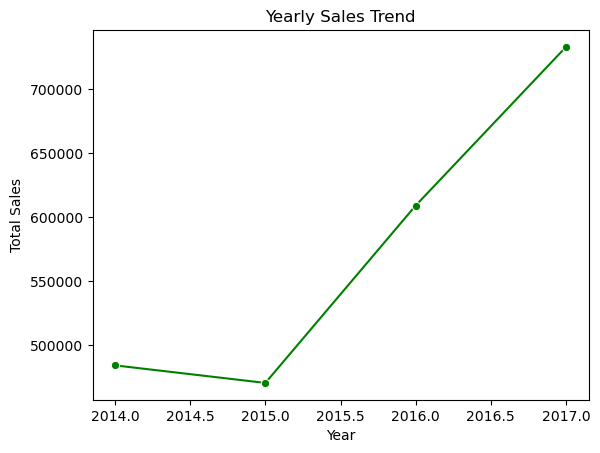

In [26]:
Yearly_Sale = df.groupby('Year')['Sales'].sum()
sns.lineplot(x = Yearly_Sale.index , y = Yearly_Sale.values , marker="o",color="Green")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")

#### 3.4.2 Monthly Sales Trend

In [46]:
df["YearMonth"]= df["Order Date"].dt.to_period('M').astype(str)

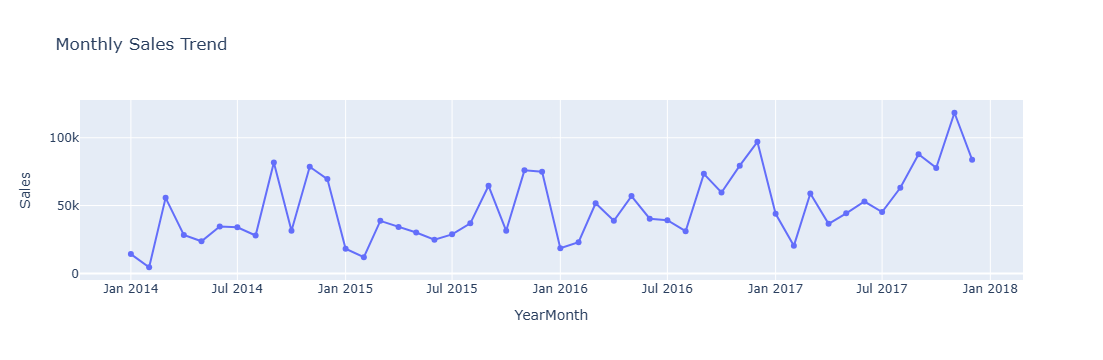

In [178]:
monthlysale= df.groupby("YearMonth")["Sales"].sum().reset_index()
px.line(monthlysale,x='YearMonth', y = 'Sales',markers=True,title="Monthly Sales Trend")

### 3.5 Customer Analysis

#### 3.5.1 Top 10 Customer By Sale

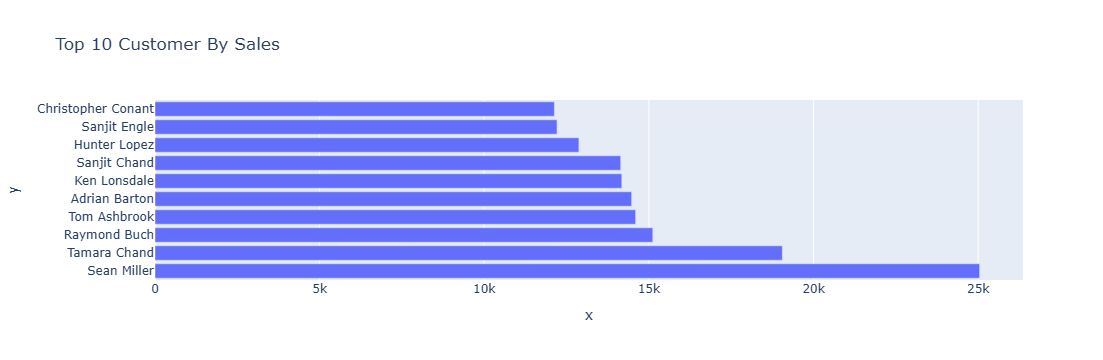

In [75]:
Top10 = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
px.bar(x= Top10.values,y= Top10.index,title="Top 10 Customer By Sales")

#### 3.5.2 Top 10 Customer By Profit

In [65]:
Top10p = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)

Text(0.5, 0, 'Sum of Profit')

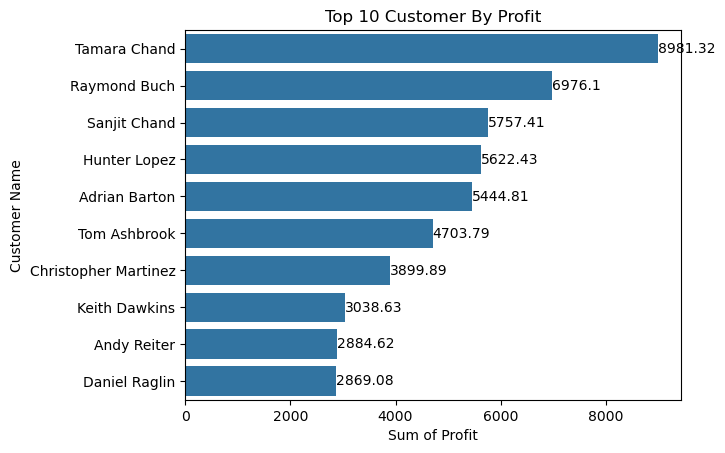

In [74]:
ax = sns.barplot(x= Top10p.values, y=Top10p.index)
ax.bar_label(ax.containers[0])
plt.title("Top 10 Customer By Profit")
plt.xlabel("Sum of Profit")

### 3.6 Discount & Profitability Analysis

####  3.6.1 Discount vs Profit

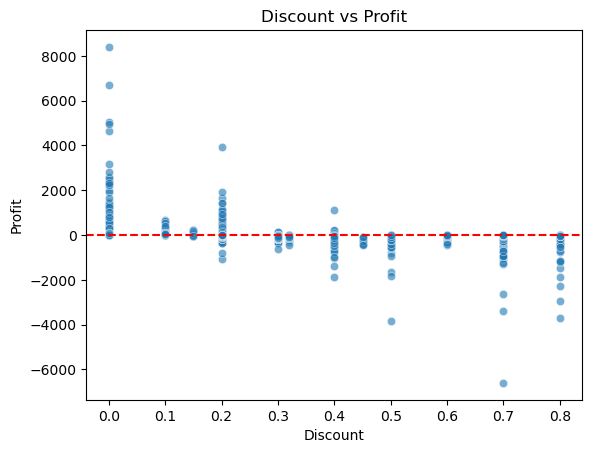

In [86]:
sns.scatterplot(df, x='Discount', y='Profit', alpha =0.6)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0, color="red", linestyle="--")  # zero profit line

### 3.7 Segment Analysis

#### 3.7.1 Sales By Segment

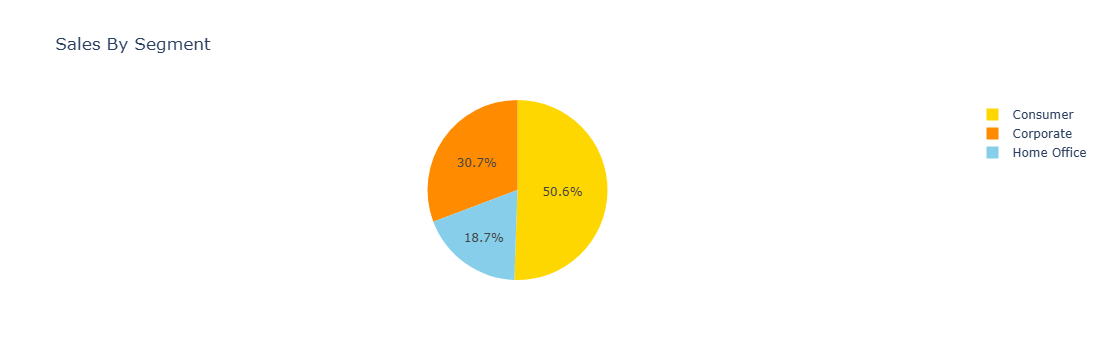

In [109]:
seg_sale = df.groupby('Segment')['Sales'].sum().reset_index()
px.pie(seg_sale, names ="Segment", values="Sales", title = "Sales By Segment",
      color_discrete_sequence=['gold', 'darkorange', 'skyblue', 'lightgreen'])

#### 3.7.2 Profit By Segment 

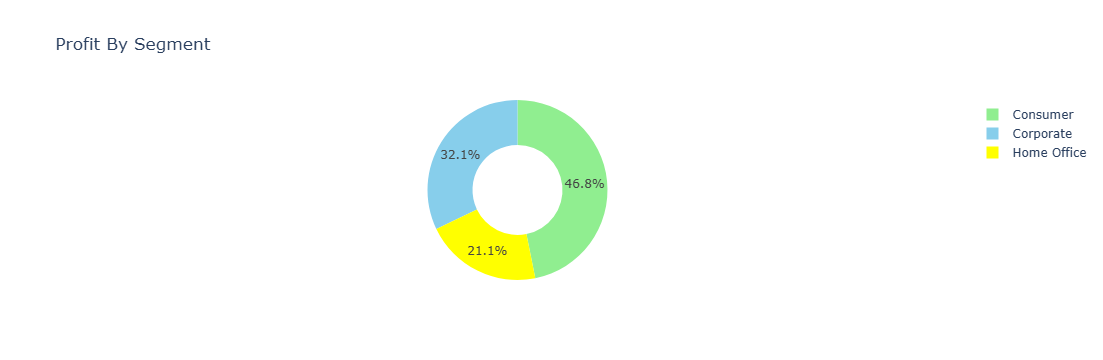

In [119]:
seg_profit = df.groupby('Segment')['Profit'].sum().reset_index()
px.pie(seg_profit, names = "Segment" , values = "Profit" , title = "Profit By Segment",
color_discrete_sequence=['lightgreen', 'skyblue', 'yellow'], hole =0.5)


### 3.8 Shipping Mode Analysis

#### 3.8.1 Orders Count by Shipping Mode

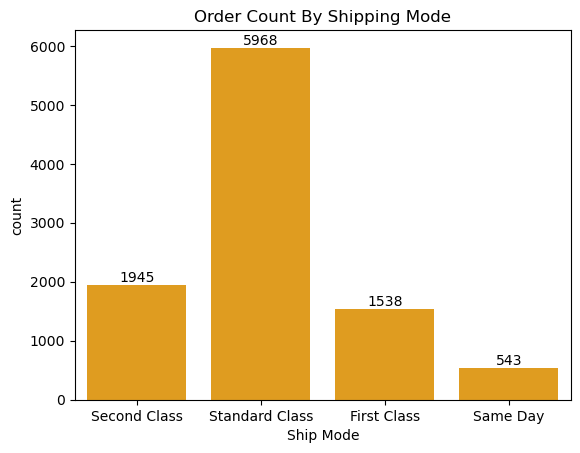

In [230]:
ax = sns.countplot(data =df, x="Ship Mode", color="orange")
plt.title("Order Count By Shipping Mode")
for container in ax.containers :
ax.bar_label(container)


#### 3.8.2 Sales by Shipping Mode

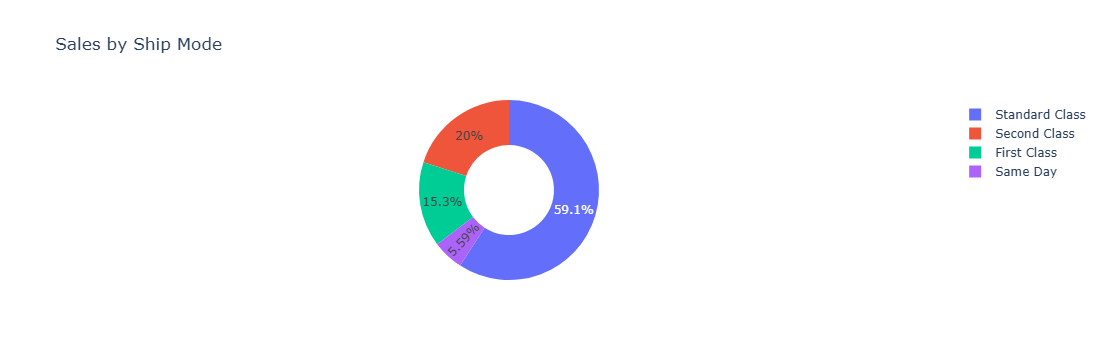

In [140]:
Shipsale = df.groupby('Ship Mode')['Sales'].sum().reset_index()
px.pie(Shipsale, names = "Ship Mode", values = "Sales",
      title ="Sales by Ship Mode" , hole = 0.5)

#### 3.8.3 Profit by Shipping Mode

Text(0.5, 1.0, 'Profit By Ship Mode')

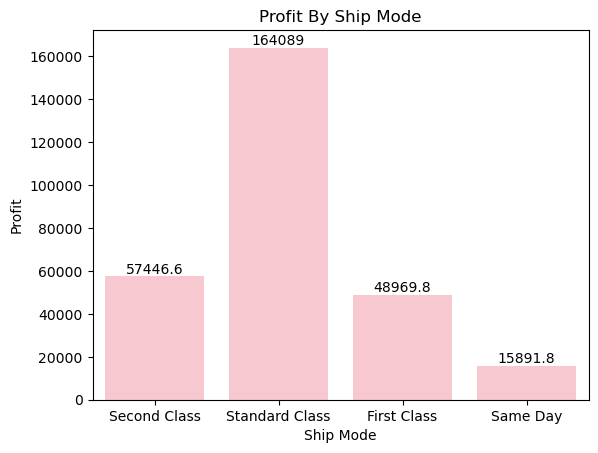

In [151]:
ps = sns.barplot(data = df , x= "Ship Mode" , y = "Profit" , estimator = sum , color = "pink",errorbar= None)
ps.bar_label(ps.containers[0])
plt.title("Profit By Ship Mode")

### 3.9 Geographical Analysis

#### 3.9.1 State wise Sales and Profit

Text(0.5, 1.0, 'State wise Sale')

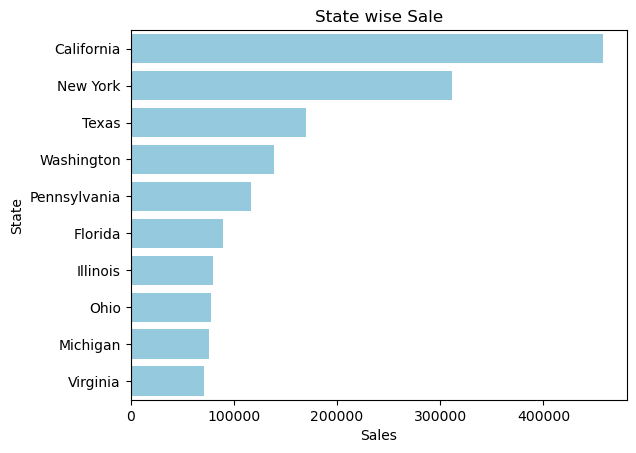

In [227]:
state_sale = df.groupby('State')['Sales'].sum().sort_values(ascending= False).head(10).reset_index()
ys= sns.barplot(data=state_sale, x="Sales", y="State", color="skyblue")
plt.title("State wise Sale")

Text(0.5, 1.0, 'State wise Profit')

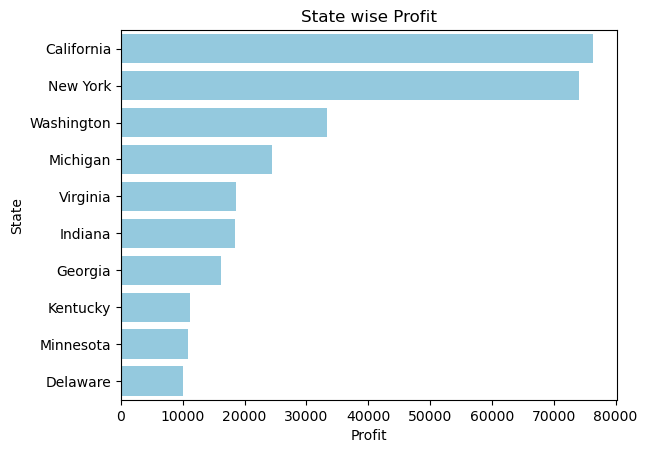

In [207]:
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending= False).head(10).reset_index()
ts= sns.barplot(data=state_profit, x="Profit", y="State", color="skyblue")
plt.title("State wise Profit")

#### 3.9.2 City wise Sales and Profit

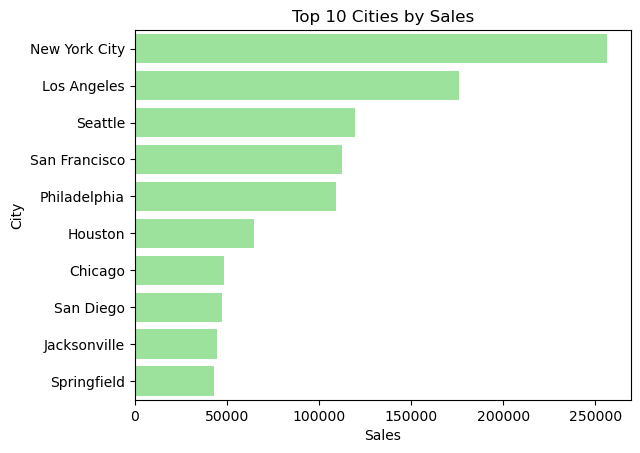

In [226]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=city_sales.values, y=city_sales.index, color="lightgreen")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales")
plt.ylabel("City")
plt.show()

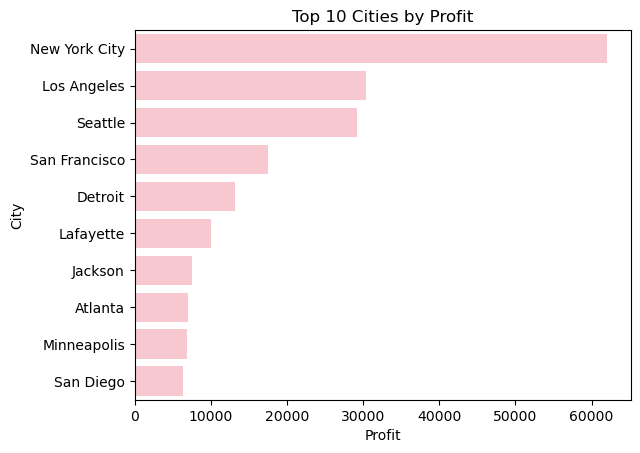

In [174]:
city_profit = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=city_profit.values, y=city_profit.index, color="pink")
plt.title("Top 10 Cities by Profit")
plt.xlabel("Profit")
plt.ylabel("City")
plt.show()

## Step 4: Final Insights

## Step 12: Final Insights & Recommendations

### 1. Sales & Profit Overview
- Total Sales = $2.3M  
- Total Profit = $286K  
- Profit Margin = ~12.5%  

### 2. Category & Sub-Category Analysis
- **Technology** is the most profitable category.  
- **Furniture (especially Tables)** is loss-making.  
- **Office Supplies** shows stable performance.  


### 3. Regional Performance
- **West & East regions** contribute the highest sales and profit.  


### 4. Time Series Trends
- Sales and profit **peak in November–December** (holiday season).  
- Mid-year sales remain relatively low.  


### 5. Customer Analysis
- The **Consumer segment** contributes the most sales.  
- The **Corporate segment** has comparatively higher profit margins.  
- A small set of customers contribute a significant share of revenue.  


### 6. Discount Impact
- Higher discounts are strongly correlated with reduced profits.  
- Discounts above 20% often lead to losses.  


### 7. Shipping Mode Analysis
- **Standard Class** is the most used shipping mode (60%+ of orders).  
- **Same-Day delivery** is used less but is costlier.  


### 8. Geographical Insights (States & Cities)
- **California** and **New York** drive the highest sales.  


##  Final Recommendations
1. Focus growth efforts on **Technology** and **Office Supplies**.  
2. Reconsider pricing and discount strategy for **Furniture–Tables**.  
3. Improve supply chain efficiency in the **South region**.  
4. Launch loyalty/retention programs for **top customers**.  
5. Limit discounts to a maximum of **20%**.  
6. Optimize shipping costs by promoting **Standard Class** over Same-Day delivery.

